## Data Pre-Processing (Cleaning and Outlier Removal)

In [1]:
# Import the requirements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data_file = "./final_data/Final List of 8 variables to be used for Analysis.csv"
data_file = "./final_data/10 Variables To Be Converted To Panel Data.csv"

data_file = "./final_data/All Companies 20100101 To 20201231 M and A Baseline 8 Variables v2.csv"
#data_file = "./final_data/All Companies 20100101 To 20201231 M and A Baseline 10 Variables.csv"
data_file = "./RF_Train_Test_var8.csv"
data_file = "./RF_Train_Test_var10.csv"

In [3]:
# Variables

Y_column  = "Acquired"
#non_data_cols = ['Acquired','Year of acquisition']
non_data_cols = ['Acquired']

In [4]:
data = pd.read_csv(data_file)
data = data.drop(columns=['Unnamed: 0'])
data.head(2)

,Company Name,2010-Sales,2010-Net Loans To Assets,2010-Profit Margin,2010-Free Cash Flow Return,2010-ROE,2010-Return on capital employed,2010-Total assets,2010-Quick ratio (times),2010-Current ratio (times),2010-Debt to equity ratio (times),2011-Sales,2011-Net Loans To Assets,2011-Profit Margin,2011-Free Cash Flow Return,2011-ROE,2011-Return on capital employed,2011-Total assets,2011-Quick ratio (times),2011-Current ratio (times),2011-Debt to equity ratio (times),2012-Sales,2012-Net Loans To Assets,2012-Profit Margin,2012-Free Cash Flow Return,2012-ROE,2012-Return on capital employed,2012-Total assets,2012-Quick ratio (times),2012-Current ratio (times),2012-Debt to equity ratio (times),2013-Sales,2013-Net Loans To Assets,2013-Profit Margin,2013-Free Cash Flow Return,2013-ROE,2013-Return on capital employed,2013-Total assets,2013-Quick ratio (times),2013-Current ratio (times),2013-Debt to equity ratio (times),2014-Sales,2014-Net Loans To Assets,2014-Profit Margin,2014-Free Cash Flow Return,2014-ROE,2014-Return on capital employed,2014-Total assets,2014-Quick ratio (times),2014-Current ratio (times),2014-Debt to equity ratio (times),2015-Sales,2015-Net Loans To Assets,2015-Profit Margin,2015-Free Cash Flow Return,2015-ROE,2015-Return on capital employed,2015-Total assets,2015-Quick ratio (times),2015-Current ratio (times),2015-Debt to equity ratio (times),2016-Sales,2016-Net Loans To Assets,2016-Profit Margin,2016-Free Cash Flow Return,2016-ROE,2016-Return on capital employed,2016-Total assets,2016-Quick ratio (times),2016-Current ratio (times),2016-Debt to equity ratio (times),2017-Sales,2017-Net Loans To Assets,2017-Profit Margin,2017-Free Cash Flow Return,2017-ROE,2017-Return on capital employed,2017-Total assets,2017-Quick ratio (times),2017-Current ratio (times),2017-Debt to equity ratio (times),2018-Sales,2018-Net Loans To Assets,2018-Profit Margin,2018-Free Cash Flow Return,2018-ROE,2018-Return on capital employed,2018-Total assets,2018-Quick ratio (times),2018-Current ratio (times),2018-Debt to equity ratio (times),2019-Sales,2019-Net Loans To Assets,2019-Profit Margin,2019-Free Cash Flow Return,2019-ROE,2019-Return on capital employed,2019-Total assets,2019-Quick ratio (times),2019-Current ratio (times),2019-Debt to equity ratio (times),2020-Sales,2020-Net Loans To Assets,2020-Profit Margin,2020-Free Cash Flow Return,2020-ROE,2020-Return on capital employed,2020-Total assets,2020-Quick ratio (times),2020-Current ratio (times),2020-Debt to equity ratio (times),Acquired,Acquisition Type,Acquisition Year,null_count
0,52 Weeks Entertainment Ltd.,NaN,0.69,0.00,0.00,NaN,NaN,1.3,0.01,0.01,NaN,NaN,NaN,24.14,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.91,49.06,-0.93,NaN,3.23,174.0,0.03,0.03,2.07,NaN,0.98,-671.65,-0.60,-180.34,-52.04,163.6,0.15,0.27,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Acquisition of Shares,Jan-13,84
1,A 2 Z Green Waste Mgmt. Ltd.,210.4,0.10,-50.31,-0.19,-140.7,-8.99,2065.3,0.32,0.45,65.72,429.0,0.22,-55.81,-0.27,NaN,-9.03,4968.2,0.86,1.31,NaN,429.0,0.22,-55.81,-0.27,NaN,-9.03,4968.2,0.86,1.31,NaN,468.9,0.19,-73.37,0.02,NaN,NaN,5816.7,0.15,0.28,NaN,431.6,0.2,-99.63,0.02,NaN,-12.33,5613.2,0.16,0.32,NaN,249.9,0.22,-87.3,0.03,NaN,-11.24,5617.0,0.15,0.29,NaN,233.0,0.19,-99.91,0.16,NaN,-16.4,5245.4,0.09,0.68,NaN,76.5,0.2,-27.03,-0.01,NaN,-25.67,4991.3,0.1,0.58,NaN,35.4,0.21,-234.02,-0.01,NaN,-14.89,4814.4,0.11,0.15,NaN,7.3,0.21,-228.82,0.0,NaN,-9.91,4719.3,0.12,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Acquisition of Shares,Mar-19,29


In [5]:
def preprocess_col_header(df):
    col_1 = df.columns
    col_1 = [item.split('-')[0] for item in col_1]
    col_1 = [f"20{item}" for item in col_1]

    col_2 = df.iloc[0].values
    col_2 = ["" if str(item) =='nan' else item for item in col_2]
    
    cols = []
    for a,b in zip(col_1, col_2):
        cols.append(f"{a}-{b}")
    
    cols[0] = 'Company Name'
    cols[89]= 'Acquired'
    cols[90] = 'Acquisition Type'
    cols[91] = 'Acquisition Year'
    df.columns = cols
    df = df[1:]
    return df

In [6]:
#data = preprocess_col_header(data)
data.head(2)

,Company Name,2010-Sales,2010-Net Loans To Assets,2010-Profit Margin,2010-Free Cash Flow Return,2010-ROE,2010-Return on capital employed,2010-Total assets,2010-Quick ratio (times),2010-Current ratio (times),2010-Debt to equity ratio (times),2011-Sales,2011-Net Loans To Assets,2011-Profit Margin,2011-Free Cash Flow Return,2011-ROE,2011-Return on capital employed,2011-Total assets,2011-Quick ratio (times),2011-Current ratio (times),2011-Debt to equity ratio (times),2012-Sales,2012-Net Loans To Assets,2012-Profit Margin,2012-Free Cash Flow Return,2012-ROE,2012-Return on capital employed,2012-Total assets,2012-Quick ratio (times),2012-Current ratio (times),2012-Debt to equity ratio (times),2013-Sales,2013-Net Loans To Assets,2013-Profit Margin,2013-Free Cash Flow Return,2013-ROE,2013-Return on capital employed,2013-Total assets,2013-Quick ratio (times),2013-Current ratio (times),2013-Debt to equity ratio (times),2014-Sales,2014-Net Loans To Assets,2014-Profit Margin,2014-Free Cash Flow Return,2014-ROE,2014-Return on capital employed,2014-Total assets,2014-Quick ratio (times),2014-Current ratio (times),2014-Debt to equity ratio (times),2015-Sales,2015-Net Loans To Assets,2015-Profit Margin,2015-Free Cash Flow Return,2015-ROE,2015-Return on capital employed,2015-Total assets,2015-Quick ratio (times),2015-Current ratio (times),2015-Debt to equity ratio (times),2016-Sales,2016-Net Loans To Assets,2016-Profit Margin,2016-Free Cash Flow Return,2016-ROE,2016-Return on capital employed,2016-Total assets,2016-Quick ratio (times),2016-Current ratio (times),2016-Debt to equity ratio (times),2017-Sales,2017-Net Loans To Assets,2017-Profit Margin,2017-Free Cash Flow Return,2017-ROE,2017-Return on capital employed,2017-Total assets,2017-Quick ratio (times),2017-Current ratio (times),2017-Debt to equity ratio (times),2018-Sales,2018-Net Loans To Assets,2018-Profit Margin,2018-Free Cash Flow Return,2018-ROE,2018-Return on capital employed,2018-Total assets,2018-Quick ratio (times),2018-Current ratio (times),2018-Debt to equity ratio (times),2019-Sales,2019-Net Loans To Assets,2019-Profit Margin,2019-Free Cash Flow Return,2019-ROE,2019-Return on capital employed,2019-Total assets,2019-Quick ratio (times),2019-Current ratio (times),2019-Debt to equity ratio (times),2020-Sales,2020-Net Loans To Assets,2020-Profit Margin,2020-Free Cash Flow Return,2020-ROE,2020-Return on capital employed,2020-Total assets,2020-Quick ratio (times),2020-Current ratio (times),2020-Debt to equity ratio (times),Acquired,Acquisition Type,Acquisition Year,null_count
0,52 Weeks Entertainment Ltd.,NaN,0.69,0.00,0.00,NaN,NaN,1.3,0.01,0.01,NaN,NaN,NaN,24.14,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,0.91,49.06,-0.93,NaN,3.23,174.0,0.03,0.03,2.07,NaN,0.98,-671.65,-0.60,-180.34,-52.04,163.6,0.15,0.27,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Acquisition of Shares,Jan-13,84
1,A 2 Z Green Waste Mgmt. Ltd.,210.4,0.10,-50.31,-0.19,-140.7,-8.99,2065.3,0.32,0.45,65.72,429.0,0.22,-55.81,-0.27,NaN,-9.03,4968.2,0.86,1.31,NaN,429.0,0.22,-55.81,-0.27,NaN,-9.03,4968.2,0.86,1.31,NaN,468.9,0.19,-73.37,0.02,NaN,NaN,5816.7,0.15,0.28,NaN,431.6,0.2,-99.63,0.02,NaN,-12.33,5613.2,0.16,0.32,NaN,249.9,0.22,-87.3,0.03,NaN,-11.24,5617.0,0.15,0.29,NaN,233.0,0.19,-99.91,0.16,NaN,-16.4,5245.4,0.09,0.68,NaN,76.5,0.2,-27.03,-0.01,NaN,-25.67,4991.3,0.1,0.58,NaN,35.4,0.21,-234.02,-0.01,NaN,-14.89,4814.4,0.11,0.15,NaN,7.3,0.21,-228.82,0.0,NaN,-9.91,4719.3,0.12,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Acquisition of Shares,Mar-19,29


In [7]:
#data['Acq Year'] = data['Acquisition Year'].apply(lambda x: f"20{x.split('-')[1]}")
data['Acquisition Year'] = pd.to_datetime(data['Acquisition Year'], format="%b-%y")
data['Acquisition Year'] = data['Acquisition Year'].dt.year

In [8]:
print(f"Total companies : {data.shape[0]}")
print(f"Companies that have all data for all years : {data.dropna().shape[0]}")

Total companies : 1438
Companies that have all data for all years : 2


In [9]:
print(f"Total Acquired companies in the dataset : {data[data[Y_column]=='Yes'].shape[0]}")

Total Acquired companies in the dataset : 595


In [10]:
col_name = None
for col in data.columns:
    if col_name:
        if col_name in col:
            print(f"{col} - {data[col].isnull().sum()}")
    else:
        print(f"{col} - {data[col].isnull().sum()}")

Company Name - 0
2010-Sales - 714
2010-Net Loans To Assets - 72
2010-Profit Margin - 101
2010-Free Cash Flow Return - 72
2010-ROE - 197
2010-Return on capital employed - 163
2010-Total assets - 72
2010-Quick ratio (times) - 143
2010-Current ratio (times) - 143
2010-Debt to equity ratio (times) - 126
2011-Sales - 649
2011-Net Loans To Assets - 52
2011-Profit Margin - 81
2011-Free Cash Flow Return - 52
2011-ROE - 148
2011-Return on capital employed - 110
2011-Total assets - 52
2011-Quick ratio (times) - 98
2011-Current ratio (times) - 98
2011-Debt to equity ratio (times) - 108
2012-Sales - 636
2012-Net Loans To Assets - 48
2012-Profit Margin - 72
2012-Free Cash Flow Return - 48
2012-ROE - 130
2012-Return on capital employed - 82
2012-Total assets - 48
2012-Quick ratio (times) - 91
2012-Current ratio (times) - 91
2012-Debt to equity ratio (times) - 110
2013-Sales - 663
2013-Net Loans To Assets - 127
2013-Profit Margin - 151
2013-Free Cash Flow Return - 127
2013-ROE - 216
2013-Return on ca

In [11]:
df_acq = data[data[Y_column]=='Yes']
df_acq.shape

(595, 115)

In [12]:
# Not Acquired
df_not_acq = data[data[Y_column]=='No']
df_not_acq.shape

(843, 115)

In [13]:
# Acquired companies containing atleast 1 
row_null = df_acq.isnull().sum(axis=1).tolist()
df_acq['null_count'] = row_null
print(df_acq[df_acq['null_count']==0].shape)
dfma = df_acq[df_acq['null_count']<80]
print(dfma.shape)

(2, 115)
(469, 115)


/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
year_count = {}
year_cols = {}
cols = data.columns
for year in range(2010, 2021):
    year_count[f"{year}-"] = 0
    year_cols[f"{year}-"] = []
    for col in data.columns:
        if f"{year}-" in col:
            year_count[f"{year}-"] +=1
            year_cols[f"{year}-"].append(col)

print(year_count)

{'2010-': 10, '2011-': 10, '2012-': 10, '2013-': 10, '2014-': 10, '2015-': 10, '2016-': 10, '2017-': 10, '2018-': 10, '2019-': 10, '2020-': 10}


In [15]:
dims = year_cols["2015-"]
dims = [dim.replace("2015-","") for dim in dims]
dims

['Sales',
 'Net Loans To Assets',
 'Profit Margin',
 'Free Cash Flow Return',
 'ROE',
 'Return on capital employed',
 'Total assets',
 'Quick ratio (times)',
 'Current ratio (times)',
 'Debt to equity ratio (times)']

In [16]:
# Remove nulls from not acquired
#df_not_acq = df_not_acq.dropna()
df_not_acq.shape

(843, 115)

In [17]:
# Prepare data (Not Acquired)
df_na_temp = pd.DataFrame()
for index, dim in enumerate(dims):
    cols = ["Company Name"]
    col_names = ["Company"]
    df_dim = pd.DataFrame()
    for i in range(2010, 2021):
        col_names.append(f"{i}")
        col_name = f"{i}-{dim}"
        cols.append(col_name)
    df_dim = df_not_acq[cols]
    df_dim.columns = col_names
    df_dim["Dimension"] = dim
    melted = pd.melt(df_dim,
              id_vars=['Company','Dimension'],
              #value_vars=df.columns[[2,3]], 
              var_name= 'year', 
              value_name='value')
    df_na_temp = pd.concat([df_na_temp, melted])
df_na_temp = df_na_temp.sort_values(['Company','Dimension'])
df_na_temp.head()

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Company,Dimension,year,value
0,A 2 Z Powercom Ltd.,Current ratio (times),2010,0.95
843,A 2 Z Powercom Ltd.,Current ratio (times),2011,0.76
1686,A 2 Z Powercom Ltd.,Current ratio (times),2012,0.56
2529,A 2 Z Powercom Ltd.,Current ratio (times),2013,0.39
3372,A 2 Z Powercom Ltd.,Current ratio (times),2014,0.43


In [18]:
pivot_na = df_na_temp.pivot_table(index=['Company', 'year'], columns='Dimension',
                     values='value', aggfunc='first').reset_index()
pivot_na['year'] = pivot_na['year'].astype(int)
pivot_na = pivot_na.set_index(['Company','year']).sort_index()
pivot_na

Dimension                            Current ratio (times)  \
Company                        year                          
A 2 Z Powercom Ltd.            2010                   0.95   
                               2011                   0.76   
                               2012                   0.56   
                               2013                   0.39   
                               2014                   0.43   
...                                                    ...   
Zen Wealth Mgmt. Services Ltd. 2016                   1.82   
                               2017                   2.73   
                               2018                  11.74   
                               2019                  30.63   
                               2020                  30.63   

Dimension                            Debt to equity ratio (times)  \
Company                        year                                 
A 2 Z Powercom Ltd.            2010                         13.26   
                               2011                         14.30   
                               2012                          4.09   
                               2013                          0.00   
                               2014                          0.00   
...                                                           ...   
Zen Wealth Mgmt. Services Ltd. 2016                          0.76   
                               2017                          0.35   
                               2018                          0.00   
                               2019                          0.00   
                               2020                          0.00   

Dimension                            Free Cash Flow Return  \
Company                        year                          
A 2 Z Powercom Ltd.            2010                  -0.14   
                               2011                  -0.14   
                               2012                   0.47   
                               2013                   0.21   
                               2014                  -0.03   
...                                                    ...   
Zen Wealth Mgmt. Services Ltd. 2016                  -0.50   
                               2017                   0.03   
                               2018                   0.08   
                               2019                   0.00   
                               2020                   0.00   

Dimension                            Net Loans To Assets  Profit Margin  \
Company                        year                                       
A 2 Z Powercom Ltd.            2010                 0.17           0.63   
                               2011                 0.40           0.61   
                               2012                 0.47          -7.75   
                               2013                 0.63        -871.43   
                               2014                 0.65           4.47   
...                                                  ...            ...   
Zen Wealth Mgmt. Services Ltd. 2016                 0.01          65.94   
                               2017                 0.02          74.17   
                               2018                 0.11          84.56   
                               2019                 0.07          42.11   
                               2020                 0.07          42.11   

Dimension                            Quick ratio (times)     ROE  \
Company                        year                                
A 2 Z Powercom Ltd.            2010                 0.85  147.62   
                               2011                 0.56   71.48   
                               2012                 0.47  -23.81   
                               2013                 0.27  -43.88   
                               2014                 0.29    7.31   
...                                 

In [19]:
df_na = pd.DataFrame(pivot_na).reset_index()
df_na.shape

(9273, 12)

In [20]:
# Set Acquired flag to 0 for all NA companies
df_na['Acquired'] = 0

## Process Acquired data

In [21]:
# Prepare data (Not Acquired)
df_acq_temp = pd.DataFrame()
for index, dim in enumerate(dims):
    cols = ["Company Name"]
    col_names = ["Company"]
    df_dim = pd.DataFrame()
    for i in range(2010, 2021):
        col_names.append(f"{i}")
        col_name = f"{i}-{dim}"
        cols.append(col_name)
    df_dim = df_acq[cols]
    df_dim.columns = col_names
    df_dim["Dimension"] = dim
    melted = pd.melt(df_dim,
              id_vars=['Company','Dimension'],
              #value_vars=df.columns[[2,3]], 
              var_name= 'year', 
              value_name='value')
    df_acq_temp = pd.concat([df_acq_temp, melted])
df_acq_temp = df_acq_temp.sort_values(['Company','Dimension'])
df_acq_temp.head()

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Company,Dimension,year,value
0,52 Weeks Entertainment Ltd.,Current ratio (times),2010,0.01
595,52 Weeks Entertainment Ltd.,Current ratio (times),2011,0.00
1190,52 Weeks Entertainment Ltd.,Current ratio (times),2012,0.03
1785,52 Weeks Entertainment Ltd.,Current ratio (times),2013,0.27
2380,52 Weeks Entertainment Ltd.,Current ratio (times),2014,NaN


In [22]:
pivot_acq = df_acq_temp.pivot_table(index=['Company', 'year'], columns='Dimension',
                     values='value', aggfunc='first').reset_index()
pivot_acq['year'] = pivot_acq['year'].astype(int)
pivot_acq = pivot_acq.set_index(['Company','year']).sort_index()
pivot_acq

Dimension                          Current ratio (times)  \
Company                      year                          
52 Weeks Entertainment Ltd.  2010                   0.01   
                             2011                   0.00   
                             2012                   0.03   
                             2013                   0.27   
A 2 Z Green Waste Mgmt. Ltd. 2010                   0.45   
...                                                  ...   
Zuari Investments Ltd.       2013                   0.51   
                             2014                   0.13   
                             2015                   0.15   
                             2016                   0.24   
                             2017                   0.15   

Dimension                          Debt to equity ratio (times)  \
Company                      year                                 
52 Weeks Entertainment Ltd.  2010                           NaN   
                             2011                           NaN   
                             2012                          2.07   
                             2013                          3.00   
A 2 Z Green Waste Mgmt. Ltd. 2010                         65.72   
...                                                         ...   
Zuari Investments Ltd.       2013                          2.52   
                             2014                          4.52   
                             2015                          2.99   
                             2016                          1.78   
                             2017                          4.59   

Dimension                          Free Cash Flow Return  Net Loans To Assets  \
Company                      year                                               
52 Weeks Entertainment Ltd.  2010                   0.00                 0.69   
                             2011                    NaN                  NaN   
                             2012                  -0.93                 0.91   
                             2013                  -0.60                 0.98   
A 2 Z Green Waste Mgmt. Ltd. 2010                  -0.19                 0.10   
...                                                  ...                  ...   
Zuari Investments Ltd.       2013                  -0.02                 0.07   
                             2014                  -0.01                 0.07   
                             2015                  -0.01                 0.02   
                             2016                   0.00                 0.03   
                             2017                   0.00                 0.00   

Dimension                          Profit Margin  Quick ratio (times)     ROE  \
Company                      year                                               
52 Weeks Entertainment Ltd.  2010           0.00                 0.01     NaN   
                             2011          24.14                 0.00     NaN   
                             2012          49.06                 0.03     NaN   
                             2013        -671.65                 0.15 -180.34   
A 2 Z Green Waste Mgmt. Ltd. 2010         -50.31                 0.32 -140.70   
...                                          ...                  ...     ...   
Zuari Investments Ltd.       2013          -5.01                 0.50   -2.20   
                             2014        -141.03                 0.13  -39.74   
                             2015        -151.96                 0.14  -53.36   
                             2016        -137.94                 0.23  -47.83   
                             2017         -36.65                 0.15  -16.04   

Dimension                          Return on capital employed  Sales  \
Company                      year                                      
52 Weeks Entertainment Ltd.  2010                         NaN    NaN   
                       

In [23]:
df_a = pd.DataFrame(pivot_acq).reset_index()
df_a.shape

(3692, 12)

In [24]:
#df_a = df_a.dropna()
df_a['Acquired'] = 1
df_a.shape

(3692, 13)

In [25]:
df_acq['Acquisition Year']

0       2013.0
1       2019.0
3       2018.0
4       2012.0
10      2013.0
         ...  
1431    2012.0
1432    2017.0
1433    2017.0
1436    2013.0
1437    2017.0
Name: Acquisition Year, Length: 595, dtype: float64

In [26]:
# Set Acquired flag for only the year in which it was acquired.
#for index, row in df_acq.iterrows():
    #df_a.loc[((df_a['Company']==row['Company Name']) & (df_a['year']==int(row['Acquisition Year']))) ,'Acquired'] = 1

In [27]:
df_a[df_a['Acquired']==1].shape

(3692, 13)

In [28]:
list1 = list(set(df_a[df_a['Acquired']==1]['Company'])) # Main data
list2 = list(set(df_acq['Company Name'])) # All acquired
print(len(list1))
print(len(list2))
list3 = [item for item in list2 if item not in list1]
print(list3) # Not in main dataset

595
595
[]


In [29]:
df_a[df_a['Company'] == 'Ivy Talent India Pvt. Ltd.']

Dimension,Company,year,Current ratio (times),Debt to equity ratio (times),Free Cash Flow Return,Net Loans To Assets,Profit Margin,Quick ratio (times),ROE,Return on capital employed,Sales,Total assets,Acquired
1618,Ivy Talent India Pvt. Ltd.,2013,1.77,0.0,0.01,0.00,15.38,1.77,NaN,NaN,NaN,114.8,1
1619,Ivy Talent India Pvt. Ltd.,2014,0.83,5.0,-0.05,0.03,-24514.29,0.83,-306.98,-3.03,NaN,3.7,1
1620,Ivy Talent India Pvt. Ltd.,2015,0.83,5.0,-0.05,0.03,-24514.29,0.83,-306.98,-3.03,NaN,3.7,1


In [30]:
df_acq[df_acq['Company Name']=='Ivy Talent India Pvt. Ltd.']

,Company Name,2010-Sales,2010-Net Loans To Assets,2010-Profit Margin,2010-Free Cash Flow Return,2010-ROE,2010-Return on capital employed,2010-Total assets,2010-Quick ratio (times),2010-Current ratio (times),2010-Debt to equity ratio (times),2011-Sales,2011-Net Loans To Assets,2011-Profit Margin,2011-Free Cash Flow Return,2011-ROE,2011-Return on capital employed,2011-Total assets,2011-Quick ratio (times),2011-Current ratio (times),2011-Debt to equity ratio (times),2012-Sales,2012-Net Loans To Assets,2012-Profit Margin,2012-Free Cash Flow Return,2012-ROE,2012-Return on capital employed,2012-Total assets,2012-Quick ratio (times),2012-Current ratio (times),2012-Debt to equity ratio (times),2013-Sales,2013-Net Loans To Assets,2013-Profit Margin,2013-Free Cash Flow Return,2013-ROE,2013-Return on capital employed,2013-Total assets,2013-Quick ratio (times),2013-Current ratio (times),2013-Debt to equity ratio (times),2014-Sales,2014-Net Loans To Assets,2014-Profit Margin,2014-Free Cash Flow Return,2014-ROE,2014-Return on capital employed,2014-Total assets,2014-Quick ratio (times),2014-Current ratio (times),2014-Debt to equity ratio (times),2015-Sales,2015-Net Loans To Assets,2015-Profit Margin,2015-Free Cash Flow Return,2015-ROE,2015-Return on capital employed,2015-Total assets,2015-Quick ratio (times),2015-Current ratio (times),2015-Debt to equity ratio (times),2016-Sales,2016-Net Loans To Assets,2016-Profit Margin,2016-Free Cash Flow Return,2016-ROE,2016-Return on capital employed,2016-Total assets,2016-Quick ratio (times),2016-Current ratio (times),2016-Debt to equity ratio (times),2017-Sales,2017-Net Loans To Assets,2017-Profit Margin,2017-Free Cash Flow Return,2017-ROE,2017-Return on capital employed,2017-Total assets,2017-Quick ratio (times),2017-Current ratio (times),2017-Debt to equity ratio (times),2018-Sales,2018-Net Loans To Assets,2018-Profit Margin,2018-Free Cash Flow Return,2018-ROE,2018-Return on capital employed,2018-Total assets,2018-Quick ratio (times),2018-Current ratio (times),2018-Debt to equity ratio (times),2019-Sales,2019-Net Loans To Assets,2019-Profit Margin,2019-Free Cash Flow Return,2019-ROE,2019-Return on capital employed,2019-Total assets,2019-Quick ratio (times),2019-Current ratio (times),2019-Debt to equity ratio (times),2020-Sales,2020-Net Loans To Assets,2020-Profit Margin,2020-Free Cash Flow Return,2020-ROE,2020-Return on capital employed,2020-Total assets,2020-Quick ratio (times),2020-Current ratio (times),2020-Debt to equity ratio (times),Acquired,Acquisition Type,Acquisition Year,null_count
630,Ivy Talent India Pvt. Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,15.38,0.01,NaN,NaN,114.8,1.77,1.77,0.0,NaN,0.03,-24514.29,-0.05,-306.98,-3.03,3.7,0.83,0.83,5.0,NaN,0.03,-24514.29,-0.05,-306.98,-3.03,3.7,0.83,0.83,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Acquisition of Shares,2016.0,85


In [31]:
# Data before outlier removal
df = pd.concat([df_na, df_a])
df.shape

(12965, 13)

In [32]:
df.to_csv("MA_before_outlier_removal_10vars.csv")
#df.to_csv("MA_before_outlier_removal_Allvars.csv")

## Outlier Removal

In [33]:
iqr_range = 15
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-iqr_range*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+iqr_range*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [34]:
for col in dims:
    #box_and_whisker(df, col)
    #_, _, _, _, minimum_Col1_before, maximum_Col1_before = get_iqr_values(df, col)
    # %% Count the outliers in the original data frame
    print(f"{col} has {count_outliers(df, col)} outliers")

Sales has 377 outliers
Net Loans To Assets has 0 outliers
Profit Margin has 558 outliers
Free Cash Flow Return has 107 outliers
ROE has 188 outliers
Return on capital employed has 263 outliers
Total assets has 876 outliers
Quick ratio (times) has 521 outliers
Current ratio (times) has 518 outliers
Debt to equity ratio (times) has 342 outliers


/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


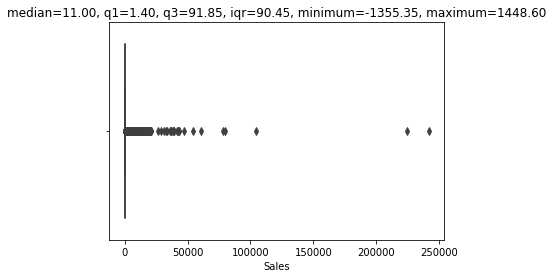

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


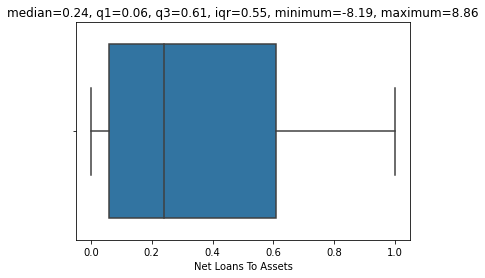

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


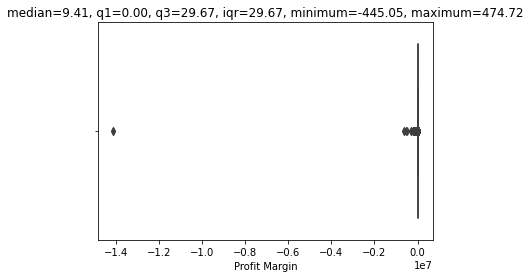

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


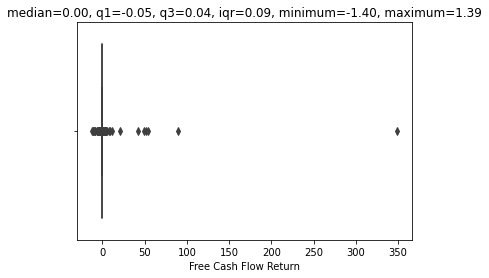

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


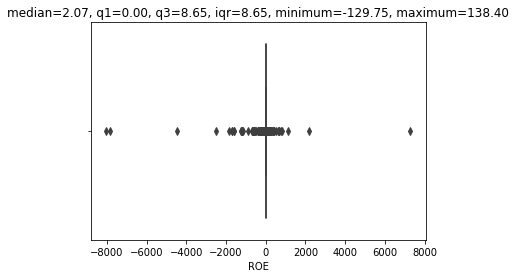

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


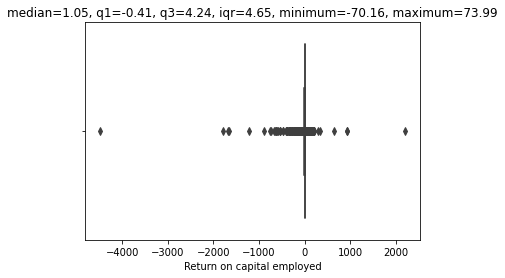

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


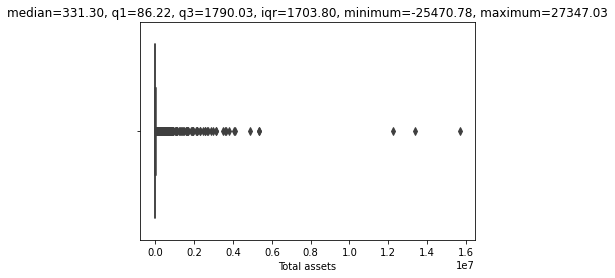

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


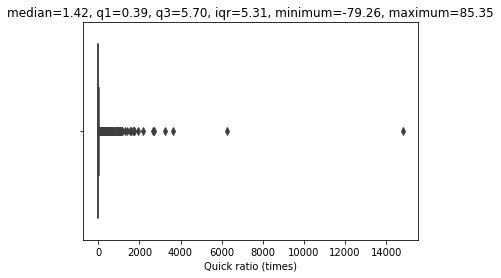

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


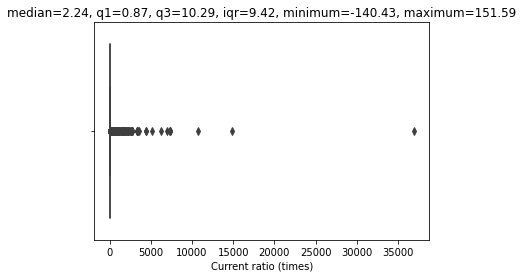

/Users/venuraja/code/projects/text/qa/qaenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


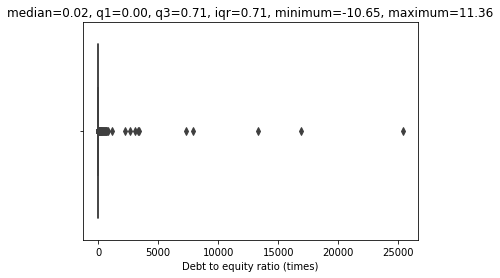

In [35]:
for col in dims:
    box_and_whisker(df, col)

In [36]:
# Remove outlier data
df_final = df.copy()
for col in dims:
    df_final = remove_outliers(df_final, col)
df_final.shape

(5562, 13)

In [37]:
df_final[df_final['Acquired']==1].shape

(826, 13)

In [38]:
#df_final.to_csv("MA_Cleaned_data_8vars.csv")
df_final.to_csv("MA_Cleaned_data_allvars.csv")

In [39]:
# Filter data from Orig dataset - only the companies in this final panel data
orig_data = data[data['Company Name'].isin(df_final['Company'].values)]

In [40]:
print(orig_data.shape)
orig_data.head(1)

(1041, 115)


,Company Name,2010-Sales,2010-Net Loans To Assets,2010-Profit Margin,2010-Free Cash Flow Return,2010-ROE,2010-Return on capital employed,2010-Total assets,2010-Quick ratio (times),2010-Current ratio (times),2010-Debt to equity ratio (times),2011-Sales,2011-Net Loans To Assets,2011-Profit Margin,2011-Free Cash Flow Return,2011-ROE,2011-Return on capital employed,2011-Total assets,2011-Quick ratio (times),2011-Current ratio (times),2011-Debt to equity ratio (times),2012-Sales,2012-Net Loans To Assets,2012-Profit Margin,2012-Free Cash Flow Return,2012-ROE,2012-Return on capital employed,2012-Total assets,2012-Quick ratio (times),2012-Current ratio (times),2012-Debt to equity ratio (times),2013-Sales,2013-Net Loans To Assets,2013-Profit Margin,2013-Free Cash Flow Return,2013-ROE,2013-Return on capital employed,2013-Total assets,2013-Quick ratio (times),2013-Current ratio (times),2013-Debt to equity ratio (times),2014-Sales,2014-Net Loans To Assets,2014-Profit Margin,2014-Free Cash Flow Return,2014-ROE,2014-Return on capital employed,2014-Total assets,2014-Quick ratio (times),2014-Current ratio (times),2014-Debt to equity ratio (times),2015-Sales,2015-Net Loans To Assets,2015-Profit Margin,2015-Free Cash Flow Return,2015-ROE,2015-Return on capital employed,2015-Total assets,2015-Quick ratio (times),2015-Current ratio (times),2015-Debt to equity ratio (times),2016-Sales,2016-Net Loans To Assets,2016-Profit Margin,2016-Free Cash Flow Return,2016-ROE,2016-Return on capital employed,2016-Total assets,2016-Quick ratio (times),2016-Current ratio (times),2016-Debt to equity ratio (times),2017-Sales,2017-Net Loans To Assets,2017-Profit Margin,2017-Free Cash Flow Return,2017-ROE,2017-Return on capital employed,2017-Total assets,2017-Quick ratio (times),2017-Current ratio (times),2017-Debt to equity ratio (times),2018-Sales,2018-Net Loans To Assets,2018-Profit Margin,2018-Free Cash Flow Return,2018-ROE,2018-Return on capital employed,2018-Total assets,2018-Quick ratio (times),2018-Current ratio (times),2018-Debt to equity ratio (times),2019-Sales,2019-Net Loans To Assets,2019-Profit Margin,2019-Free Cash Flow Return,2019-ROE,2019-Return on capital employed,2019-Total assets,2019-Quick ratio (times),2019-Current ratio (times),2019-Debt to equity ratio (times),2020-Sales,2020-Net Loans To Assets,2020-Profit Margin,2020-Free Cash Flow Return,2020-ROE,2020-Return on capital employed,2020-Total assets,2020-Quick ratio (times),2020-Current ratio (times),2020-Debt to equity ratio (times),Acquired,Acquisition Type,Acquisition Year,null_count
2,A 2 Z Powercom Ltd.,1477.4,0.17,0.63,-0.14,147.62,11.64,830.3,0.85,0.95,13.26,1633.0,0.4,0.61,-0.14,71.48,4.8,638.7,0.56,0.76,14.3,47.2,0.47,-7.75,0.47,-23.81,-4.46,360.0,0.47,0.56,4.09,NaN,0.63,-871.43,0.21,-43.88,-13.77,252.3,0.27,0.39,0.0,17.8,0.65,4.47,-0.03,7.31,11.87,289.7,0.29,0.43,0.0,273.3,0.33,1.79,-0.19,33.91,6.29,568.4,0.65,0.72,7.12,263.1,0.21,1.11,0.02,15.31,1.95,731.1,0.8,0.82,6.63,162.2,0.38,-2.69,0.0,-22.96,-2.79,487.6,0.32,0.7,8.35,143.4,0.53,-4.35,1.21,-46.21,-14.41,116.8,0.46,0.82,0.0,NaN,0.6,25.81,0.0,6.81,6.81,103.5,0.4,0.81,0.0,NaN,0.6,25.81,0.0,6.81,6.81,103.5,0.4,0.81,0.0,No,NaN,NaN,5


In [41]:
orig_data[orig_data['Acquired Flag'] =='Acquired'].shape

KeyError: 'Acquired Flag'

In [ ]:
orig_data.to_csv("MA_data_rf_model.csv")